In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

## Visualizing first results

In [ ]:
train_data = np.load('data/X_train_TN_10000_time_2_zone=IV.npz')
X_train = train_data['x']
y_train = train_data['y']

test_data = np.load('data/X_test_TN_5000_time_2_zone=IV.npz')
X_test = test_data['x']
y_test = test_data['y']


X_train_flat = np.array([sublist for sublist in X_train])
X_train_flat = X_train_flat.reshape(X_train_flat.shape[0], X_train_flat.shape[1], )

X_test_flat = np.array([sublist for sublist in X_test])
X_test_flat = X_test_flat.reshape(X_test_flat.shape[0], X_test_flat.shape[1], )

In [ ]:
accuracy = []
scaler = StandardScaler()
X_train = scaler.fit_transform(np.real(np.array(X_train_flat)))
X_test = scaler.transform(np.real(np.array(X_test_flat)))
for i in np.linspace(1000, 15000, 5):
    clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
    clf.fit(X_train[:int(i)], y_train[:int(i)])

    y_class = clf.predict(X_test)
    accuracy.append(np.sum(y_class == y_test) / len(y_test))

/home/victor/TFM/simulacion/tp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/victor/TFM/simulacion/tp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/victor/TFM/simulacion/tp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/victor/TFM/simulacion/tp/lib/python3.12/site-packages/sklearn/linear_model/_log

#### Check the accuracy tendency as the training data set grows

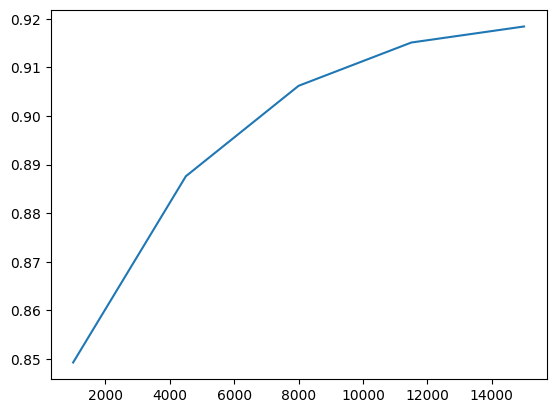

In [7]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1000, 15000, 5), accuracy)